# **Predict Health Outcomes of Horses**

The goal of this competition is to predict the health outcomes of horses based on the various medical indicators provided. 

### **Part 1: Data Understanding**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('train[1].csv')

In [3]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

Based on the list of columns I believe the most important columns are age, pain, surgery, pain, and packed_cell_volume. These are the important features based on looking.


In [5]:
df.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


This tells us a lot about outliers so if there is a big space between min and max that mean that there is an outlier in the specific column. From here we can tell that pulse, respiratory_rate,packed_cell_volume, total protein, lesion_1, lesion_2, lesion_3,has a really big outliers. I think the first few are tests that were preformed on the horses so we can not do anything about it but the lesion 1,2, and 3 has 2,000 difference between the min and max.

In [6]:
df.count()

id                       1235
surgery                  1235
age                      1235
hospital_number          1235
rectal_temp              1235
pulse                    1235
respiratory_rate         1235
temp_of_extremities      1235
peripheral_pulse         1235
mucous_membrane          1235
capillary_refill_time    1235
pain                     1235
peristalsis              1235
abdominal_distention     1235
nasogastric_tube         1235
nasogastric_reflux       1235
nasogastric_reflux_ph    1235
rectal_exam_feces        1235
abdomen                  1235
packed_cell_volume       1235
total_protein            1235
abdomo_appearance        1235
abdomo_protein           1235
surgical_lesion          1235
lesion_1                 1235
lesion_2                 1235
lesion_3                 1235
cp_data                  1235
outcome                  1235
dtype: int64

there is no missing information that you can tell based on the counts. 

In [7]:
len(df)

1235

In [8]:
len(df.columns)

29

I want to be able to look at each column of the data in order to look at the unique entries to be able to gain more data understanding. This will also be able to allow me to see the data types needed in each columns and if there was any error with labeling them. 

In [9]:
for column in df.columns:
    unique_values_counts = df['surgery'].value_counts()
print(unique_values_counts)

yes    887
no     348
Name: surgery, dtype: int64


In [10]:
for column in df.columns:
    unique_values_counts = df['age'].value_counts()
print(unique_values_counts)

adult    1160
young      75
Name: age, dtype: int64


Since I am thinking about using a decision tree and KNN for the machine learning algorithm, this will give me the chance to see which columns need to be encoded.  

In [11]:
for column in df.columns:
    unique_values_counts = df['rectal_temp'].value_counts()
print(unique_values_counts)

38.0    120
38.1    103
38.3    100
38.2     80
38.5     78
37.8     77
37.5     59
38.6     59
38.4     50
37.2     48
39.3     41
37.1     38
40.3     37
37.6     35
39.1     30
39.2     26
37.7     24
37.3     23
37.9     22
39.0     20
38.9     20
38.7     19
39.4     16
37.4     16
39.5     15
38.8     15
36.1     11
36.5      8
39.6      6
36.6      5
36.0      5
36.7      4
37.0      4
39.7      4
36.8      3
35.4      3
39.9      2
39.8      2
40.8      2
36.4      2
36.9      1
36.2      1
40.0      1
Name: rectal_temp, dtype: int64


In [12]:
for column in df.columns:
    unique_values_counts = df['pulse'].value_counts()
print(unique_values_counts)

48.0     106
52.0      98
88.0      86
60.0      83
84.0      71
96.0      62
114.0     61
66.0      61
108.0     44
72.0      41
64.0      37
100.0     36
54.0      34
80.0      31
44.0      31
40.0      28
120.0     25
86.0      25
104.0     24
112.0     23
129.0     22
164.0     20
56.0      18
36.0      17
92.0      16
42.0      16
68.0      13
76.0      11
132.0     11
75.0      10
136.0     10
124.0     10
130.0      7
50.0       6
128.0      6
184.0      4
90.0       4
78.0       4
140.0      3
150.0      3
45.0       3
70.0       3
98.0       3
30.0       2
49.0       1
146.0      1
82.0       1
160.0      1
46.0       1
110.0      1
Name: pulse, dtype: int64


In [13]:
for column in df.columns:
    unique_values_counts = df['respiratory_rate'].value_counts()
print(unique_values_counts)

24.0    163
36.0    145
12.0    141
16.0    124
20.0    103
40.0     93
30.0     77
48.0     65
28.0     63
51.0     41
32.0     41
18.0     34
14.0     18
84.0     16
44.0     13
80.0     10
21.0     10
96.0     10
60.0      8
68.0      8
9.0       8
50.0      5
42.0      5
90.0      5
35.0      5
88.0      3
8.0       3
52.0      3
66.0      3
10.0      3
70.0      2
22.0      2
13.0      1
26.0      1
25.0      1
58.0      1
23.0      1
Name: respiratory_rate, dtype: int64


In [14]:
for column in df.columns:
    unique_values_counts = df['temp_of_extremities'].value_counts()
print(unique_values_counts)

cool      700
normal    324
cold      121
warm       51
None       39
Name: temp_of_extremities, dtype: int64


In [15]:
for column in df.columns:
    unique_values_counts = df['peripheral_pulse'].value_counts()
print(unique_values_counts)

reduced      724
normal       429
None          60
absent        18
increased      4
Name: peripheral_pulse, dtype: int64


In [16]:
for column in df.columns:
    unique_values_counts = df['mucous_membrane'].value_counts()
print(unique_values_counts)

pale_pink        284
normal_pink      260
pale_cyanotic    250
bright_red       211
dark_cyanotic    121
bright_pink       88
None              21
Name: mucous_membrane, dtype: int64


In [17]:
for column in df.columns:
    unique_values_counts = df['capillary_refill_time'].value_counts()
print(unique_values_counts)

less_3_sec    834
more_3_sec    393
None            6
3               2
Name: capillary_refill_time, dtype: int64


In [18]:
for column in df.columns:
    unique_values_counts = df['pain'].value_counts()
print(unique_values_counts)

depressed       429
mild_pain       408
severe_pain     146
extreme_pain    120
alert            87
None             44
slight            1
Name: pain, dtype: int64


In [19]:
for column in df.columns:
    unique_values_counts = df['peristalsis'].value_counts()
print(unique_values_counts)

hypomotile       664
absent           444
normal            53
hypermotile       53
None              20
distend_small      1
Name: peristalsis, dtype: int64


In [20]:
for column in df.columns:
    unique_values_counts = df['abdominal_distention'].value_counts()
print(unique_values_counts)

moderate    543
slight      346
none        212
severe      111
None         23
Name: abdominal_distention, dtype: int64


In [21]:
for column in df.columns:
    unique_values_counts = df['nasogastric_tube'].value_counts()
print(unique_values_counts)

slight         758
none           275
significant    122
None            80
Name: nasogastric_tube, dtype: int64


In [22]:
for column in df.columns:
    unique_values_counts = df['nasogastric_reflux'].value_counts()
print(unique_values_counts)

more_1_liter    604
none            331
less_1_liter    278
None             21
slight            1
Name: nasogastric_reflux, dtype: int64


In [23]:
for column in df.columns:
    unique_values_counts = df['nasogastric_reflux_ph'].value_counts()
print(unique_values_counts)

2.0    283
7.0    203
5.0    129
3.0    103
4.5     93
6.5     69
4.0     62
5.5     59
1.0     45
5.3     31
4.4     27
6.0     20
7.5     19
5.7     16
3.5     16
5.4     16
4.3     10
1.5      8
6.2      8
5.2      7
7.2      6
6.8      1
4.2      1
3.4      1
2.6      1
6.6      1
Name: nasogastric_reflux_ph, dtype: int64


In [24]:
for column in df.columns:
    unique_values_counts = df['rectal_exam_feces'].value_counts()
print(unique_values_counts)

absent           493
decreased        269
normal           233
None             190
increased         49
serosanguious      1
Name: rectal_exam_feces, dtype: int64


In [25]:
for column in df.columns:
    unique_values_counts = df['abdomen'].value_counts()
print(unique_values_counts)

distend_small    482
distend_large    359
None             213
normal            76
firm              72
other             33
Name: abdomen, dtype: int64


In [26]:
for column in df.columns:
    unique_values_counts = df['packed_cell_volume'].value_counts()
print(unique_values_counts)

57.0    105
48.0     84
44.0     70
47.0     66
52.0     65
45.0     60
43.0     52
37.0     46
49.0     46
54.0     46
50.0     42
41.0     39
75.0     34
39.0     33
66.0     31
36.0     30
40.0     30
65.0     29
33.0     24
55.0     24
42.0     24
46.0     24
53.0     23
60.0     23
35.0     22
68.0     18
73.0     15
69.0     14
64.0     13
51.0     13
38.0     10
59.0      9
32.0      8
30.0      8
34.0      7
63.0      7
31.5      6
72.0      6
58.0      5
67.0      4
26.0      3
56.0      3
74.0      3
37.5      2
23.0      2
28.0      2
71.0      2
31.0      2
70.0      1
Name: packed_cell_volume, dtype: int64


In [27]:
for column in df.columns:
    unique_values_counts = df['total_protein'].value_counts()
print(unique_values_counts)

7.5     135
7.0      77
6.5      68
6.6      67
8.1      64
       ... 
84.0      1
3.7       1
63.0      1
7.9       1
58.0      1
Name: total_protein, Length: 83, dtype: int64


In [28]:
for column in df.columns:
    unique_values_counts = df['abdomo_appearance'].value_counts()
print(unique_values_counts)

serosanguious    570
cloudy           359
clear            258
None              48
Name: abdomo_appearance, dtype: int64


In [29]:
for column in df.columns:
    unique_values_counts = df['abdomo_protein'].value_counts()
print(unique_values_counts)

2.0     301
2.6      97
3.6      88
1.0      74
4.5      68
3.9      61
3.4      53
5.0      47
5.3      37
4.3      36
4.1      29
2.8      22
3.2      22
3.3      19
2.3      19
3.0      18
1.6      17
3.7      17
6.0      17
2.9      17
7.0      14
7.4      13
1.3      13
4.4      12
4.8      11
6.6      11
8.0      10
4.7      10
5.2       9
2.1       8
1.5       7
2.5       7
10.1      5
4.9       5
1.4       5
2.2       5
2.7       3
5.4       3
4.6       3
3.5       3
6.5       2
0.1       2
7.2       2
2.4       2
10.0      2
7.5       1
9.1       1
6.2       1
7.6       1
4.2       1
6.3       1
8.1       1
1.7       1
4.0       1
Name: abdomo_protein, dtype: int64


In [30]:
for column in df.columns:
    unique_values_counts = df['surgical_lesion'].value_counts()
print(unique_values_counts)

yes    929
no     306
Name: surgical_lesion, dtype: int64


In [31]:
for column in df.columns:
    unique_values_counts = df['lesion_1'].value_counts()
print(unique_values_counts)

2208     152
3205     116
2205     104
2209     102
0         94
3111      91
2124      52
1400      49
4205      45
2112      40
31110     39
2206      35
5400      35
7111      31
2113      30
2207      26
400       15
7400      14
3209      13
7209      12
4300       9
3025       9
12208      8
2300       8
8300       7
2322       6
3113       6
5206       6
3207       6
8400       5
9400       5
5000       5
3133       4
11300      4
5205       4
5111       4
3115       4
6111       4
1124       3
4124       3
11400      3
2111       3
4206       3
1111       2
6112       2
300        2
3124       2
6209       2
2305       2
5124       2
3112       1
3300       1
2202       1
4207       1
11124      1
21110      1
41110      1
Name: lesion_1, dtype: int64


In [32]:
for column in df.columns:
    unique_values_counts = df['lesion_2'].value_counts()
print(unique_values_counts)

0       1227
1400       4
3111       2
3112       2
Name: lesion_2, dtype: int64


In [33]:
for column in df.columns:
    unique_values_counts = df['lesion_3'].value_counts()
print(unique_values_counts)

0       1233
2209       2
Name: lesion_3, dtype: int64


lesion means a region in an organ or tissue which has suffered damage through injury or disease, such as a wound, ulcer, anscess, or tumor. 

There are 29 columns and looking at their unique values made me realize that I need to narrow down the columns so I can get a more precise prediction. This code allowed me to look at how each unique value is distributed. From this I do not think column lesions 2 and 3 are important because there are 3 unique values and most of them are zero meaning most horses are not affected by organ damage.  I think from here the best thing to do is a heat correlating map to see how each column correlates with each other. 


In [34]:
df.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

All the columns have the correct data types so there is no error.

In [35]:
df.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

It seems like there is no missing data.

In [36]:
missing_values = ['NA', 'NaN', 'None', 'N/A', '']
missing_in_columns = df.isin(missing_values).any()
columns_with_missing = missing_in_columns[missing_in_columns].index
print(columns_with_missing)


Index(['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
       'abdomen', 'abdomo_appearance'],
      dtype='object')


I belive this columns have missing values and I need to check if I should just remove it or replace it with something else. 

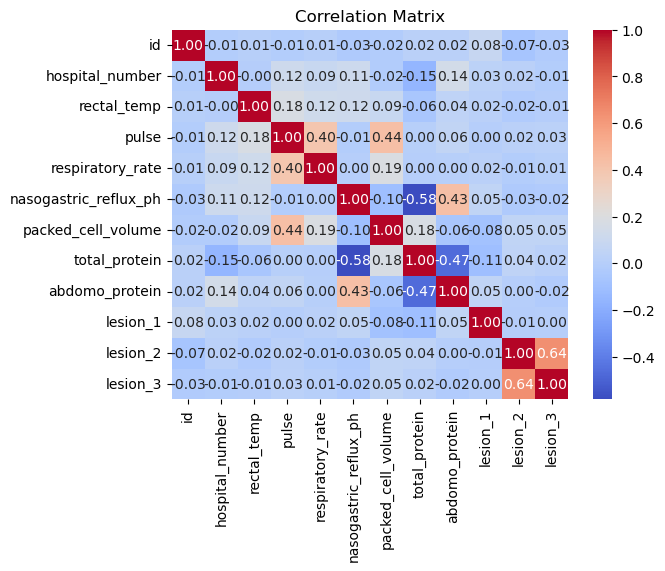

In [37]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Correlation Matrix')
plt.show()

from the heatmap I can see that pulse, respiratory_rate, packed_cell_volume, total protein, and abdomo_protein has the most correlation but this is just comparing the numerical values I want to encode all the categorical varables and compare them with the outcome. 

## **Part 2: Data Preprocessing**

In [38]:
df.shape

(1235, 29)

In [39]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [40]:
missing_values = ['NA', 'NaN', 'N/A', '']
missing_in_columns = df.isin(missing_values).any()
columns_with_missing = missing_in_columns[missing_in_columns].index
print(columns_with_missing)

Index([], dtype='object')


In [41]:
columns_with_missing = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
                        'capillary_refill_time', 'pain', 'peristalsis', 
                        'abdominal_distention', 'nasogastric_tube', 
                        'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 
                        'abdomo_appearance']
missing_values = ['NA', 'NaN', 'None', 'N/A', '']


mask = df[columns_with_missing].isin(missing_values).any(axis=1)

# Remove rows identified by the mask
df = df[~mask]

# Check the shape of the DataFrame after removing rows with missing values
print(f"Shape after removing missing values: {df.shape}")



Shape after removing missing values: (771, 29)


In [42]:
missing_values = ['NA', 'NaN', 'None', 'N/A', '']
missing_in_columns = df.isin(missing_values).any()
columns_with_missing = missing_in_columns[missing_in_columns].index
print(columns_with_missing)

Index([], dtype='object')


Know we do not have any missing values in the categorical columns. 

#### **Outliers**

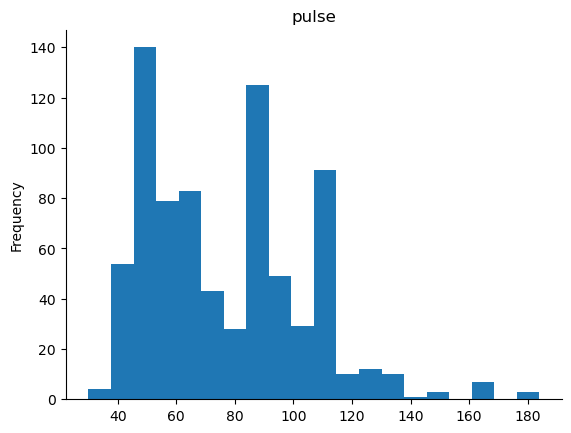

In [43]:
from matplotlib import pyplot as plt
df['pulse'].plot (kind='hist', bins=20, title='pulse')
plt.gca().spines[['top','right']].set_visible(False)

I do not thihnk 160 and 180 is an outlier by mistake because horses pulses can go up to 200 if they are doing cross country and it can come down to 70 beats per minute so I will not be removing the outliers here.

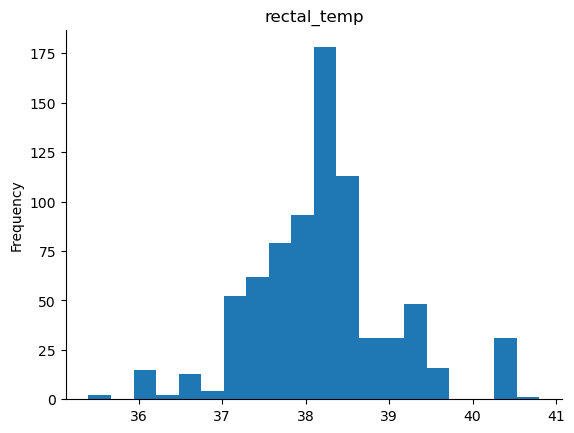

In [44]:
from matplotlib import pyplot as plt
df['rectal_temp'].plot (kind='hist', bins=20, title='rectal_temp')
plt.gca().spines[['top','right']].set_visible(False)

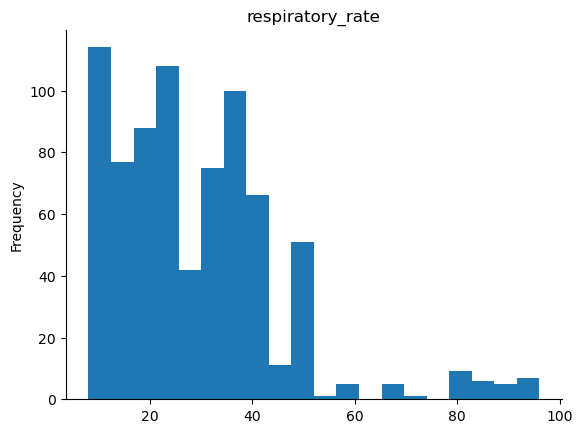

In [45]:
from matplotlib import pyplot as plt
df['respiratory_rate'].plot (kind='hist', bins=20, title='respiratory_rate')
plt.gca().spines[['top','right']].set_visible(False)

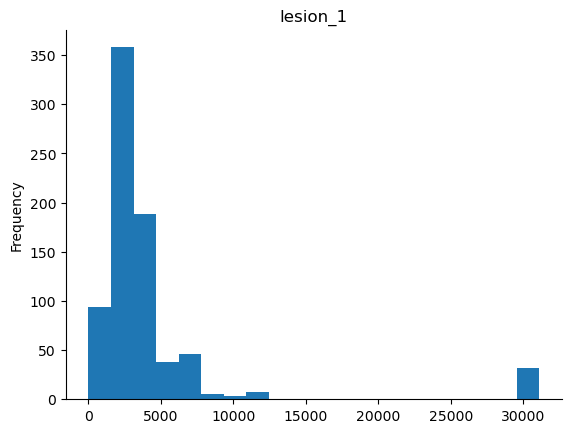

In [46]:
from matplotlib import pyplot as plt
df['lesion_1'].plot (kind='hist', bins=20, title='lesion_1')
plt.gca().spines[['top','right']].set_visible(False)

I am going to remove this row because I do not think it is important. 

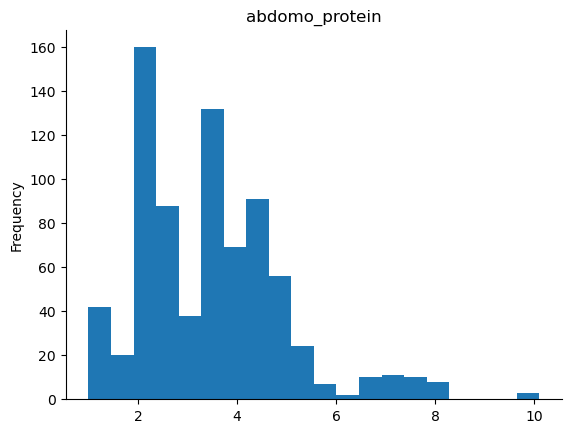

In [47]:
from matplotlib import pyplot as plt
df['abdomo_protein'].plot (kind='hist', bins=20, title='abdomo_protein')
plt.gca().spines[['top','right']].set_visible(False)

I know there are some outliers but I don't want to remove them because they are needed inorder to see the whole story and predict if the horses are sick or not.

#### **Transformation**

I want to do one hot encoding on all the catgorical values so I can see which columns are the most important. 

In [48]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the 'surgical_lesion' column using LabelEncoder and assign it back to the DataFrame
df.loc[:, 'surgical_lesion'] = label_encoder.fit_transform(df['surgical_lesion'])


In [49]:
df.loc[:, 'abdomo_appearance'] = label_encoder.fit_transform(df['abdomo_appearance'])

In [50]:
for column in df.columns:
    unique_values_counts = df['rectal_exam_feces'].value_counts()
print(unique_values_counts)

absent           387
decreased        194
normal           150
increased         39
serosanguious      1
Name: rectal_exam_feces, dtype: int64


In [51]:
df.loc[:, 'abdomen'] = label_encoder.fit_transform(df['abdomen'])

In [52]:
df.loc[:, 'rectal_exam_feces'] = label_encoder.fit_transform(df['rectal_exam_feces'])

In [53]:
df.loc[:, 'nasogastric_reflux'] = label_encoder.fit_transform(df['nasogastric_reflux'])

In [54]:
df.loc[:, 'nasogastric_tube'] = label_encoder.fit_transform(df['nasogastric_tube'])

In [55]:
df.loc[:, 'abdominal_distention'] = label_encoder.fit_transform(df['abdominal_distention'])

In [56]:
df.loc[:, 'peristalsis'] = label_encoder.fit_transform(df['peristalsis'])

In [57]:
df.loc[:, 'pain'] = label_encoder.fit_transform(df['pain'])

In [58]:
df.loc[:, 'capillary_refill_time'] = label_encoder.fit_transform(df['capillary_refill_time'])

In [59]:
df.loc[:, 'mucous_membrane'] = label_encoder.fit_transform(df['mucous_membrane'])

In [60]:
df.loc[:, 'peripheral_pulse'] = label_encoder.fit_transform(df['peripheral_pulse'])

In [61]:
df.loc[:, 'temp_of_extremities'] = label_encoder.fit_transform(df['temp_of_extremities'])

In [62]:
df.loc[:, 'age'] = label_encoder.fit_transform(df['age'])

In [63]:
df.loc[:, 'surgery'] = label_encoder.fit_transform(df['surgery'])

In [64]:
df.loc[:, 'outcome'] = label_encoder.fit_transform(df['outcome'])

In [65]:
df.loc[:, 'cp_data'] = label_encoder.fit_transform(df['cp_data'])

In [66]:
df.dtypes

id                         int64
surgery                    int32
age                        int32
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities        int32
peripheral_pulse           int32
mucous_membrane            int32
capillary_refill_time      int32
pain                       int32
peristalsis                int32
abdominal_distention       int32
nasogastric_tube           int32
nasogastric_reflux         int32
nasogastric_reflux_ph    float64
rectal_exam_feces          int32
abdomen                    int32
packed_cell_volume       float64
total_protein            float64
abdomo_appearance          int32
abdomo_protein           float64
surgical_lesion            int32
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                    int32
outcome                    int32
dtype: object

## **Part 3: Model Development and Evalution**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [140]:
features = ['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities','peripheral_pulse', 'mucous_membrane','capillary_refill_time', 'pain', 'peristalsis','abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']
X = df[features]
y = df['outcome']

In [141]:
numerical_features = ['lesion_2','lesion_1','nasogastric_reflux_ph','respiratory_rate','pulse','rectal_temp','abdomo_protein', 'total_protein','packed_cell_volume']
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler())])

In [165]:
categorical_features = ['surgical_lesion', 'abdomo_appearance','abdomen','rectal_exam_feces','nasogastric_reflux', 
'nasogastric_tube','abdominal_distention','peristalsis','pain','capillary_refill_time','mucous_membrane','peripheral_pulse','temp_of_extremities','age','surgery','cp_data','lesion_3']

categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent')),
                                           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [166]:
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
                                              ('cat', categorical_transformer, categorical_features)])

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=470)

In [172]:
dt_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=5, random_state=40000))])

In [173]:
dt_pipeline.fit(X_train,y_train)

C:\Users\betty\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lesion_2', 'lesion_1',
                                                   'nasogastric_reflux_ph',
                                                   'respiratory_rate', 'pulse',
                                                   'rectal_temp',
                                                   'abdomo_protein',
                                                   'total_protein',
                                                   'packed_cell_volume']),
                                                 ('cat',

In [174]:
y_pred_dt = dt_pipeline.predict(X_test)

In [175]:
accuracy_ti = accuracy_score(y_test, y_pred_dt)
accuracy_ti

0.6077586206896551

### **KNN**

In [177]:
knn_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
('classifier', KNeighborsClassifier(n_neighbors=5))])


In [178]:
knn_pipeline.fit(X_train,y_train)

C:\Users\betty\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lesion_2', 'lesion_1',
                                                   'nasogastric_reflux_ph',
                                                   'respiratory_rate', 'pulse',
                                                   'rectal_temp',
                                                   'abdomo_protein',
                                                   'total_protein',
                                                   'packed_cell_volume']),
                                                 ('cat',

In [180]:
y_pred_knn = knn_pipeline.predict(X_test)

C:\Users\betty\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [181]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn


0.6422413793103449

<AxesSubplot:>

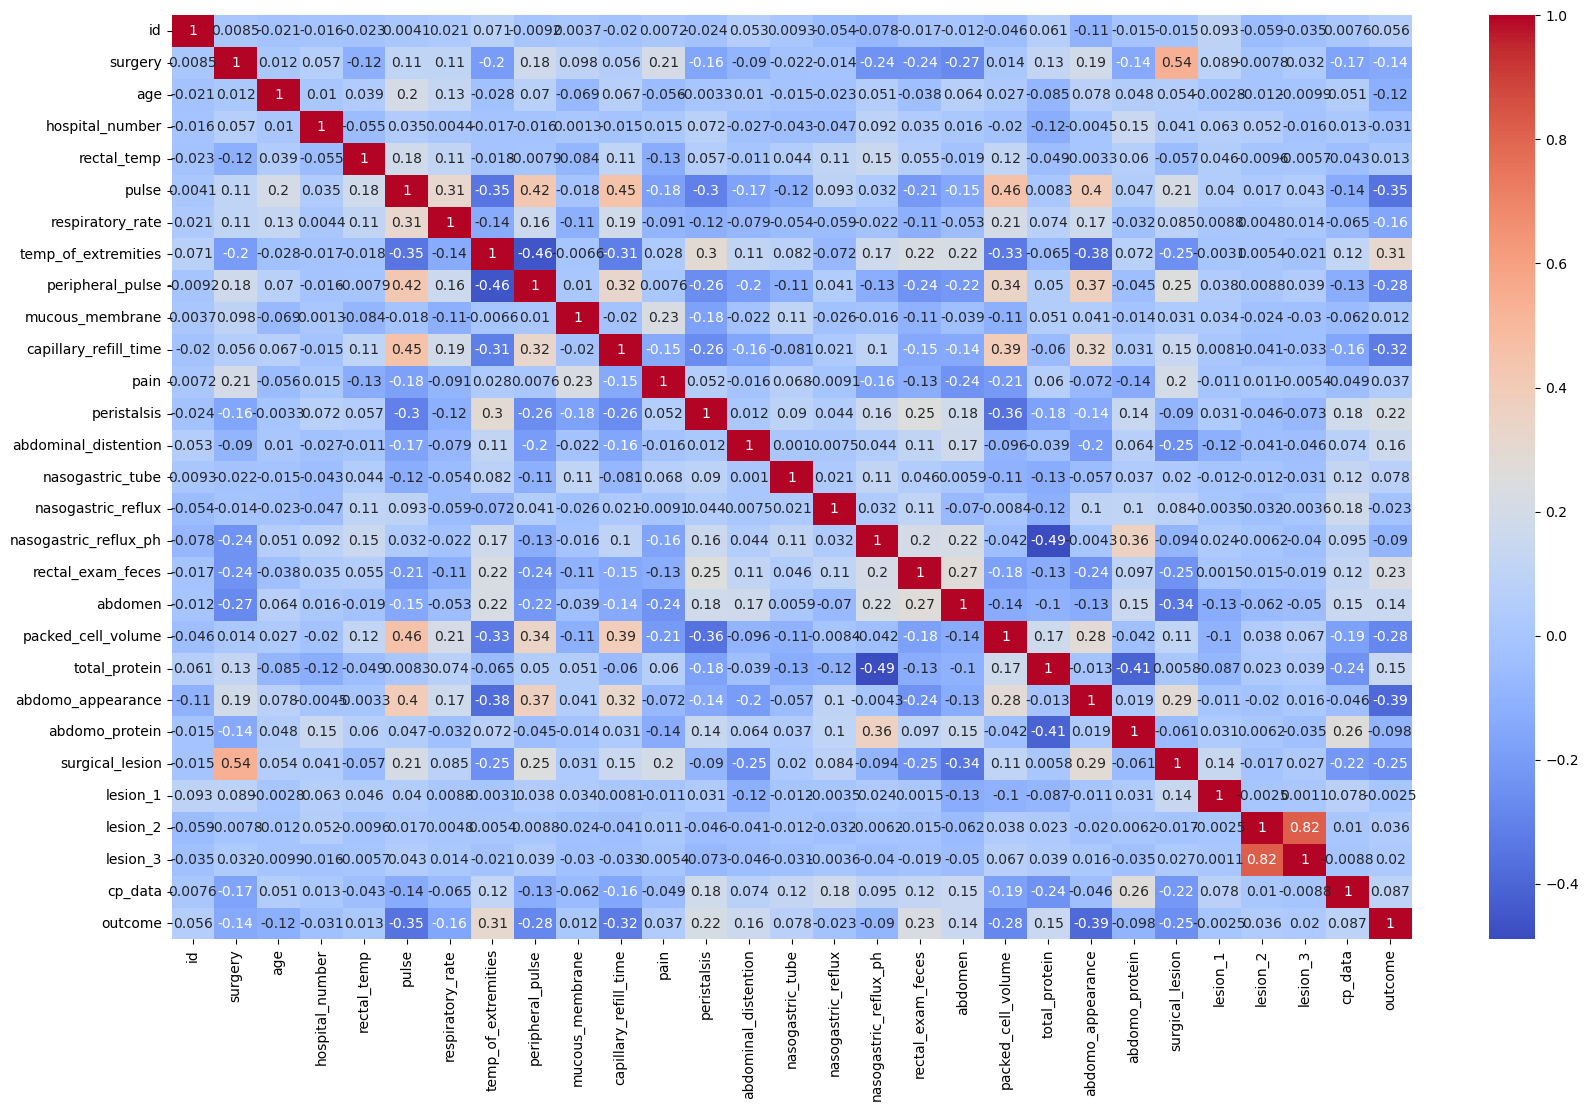

In [183]:
plt.figure(figsize=(20,12))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap='coolwarm')


SO based of this heatmap: the columns that corr. most with the outcomes are temp_of_extremities, peristalsis, rectal_exam_feces
